In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [3]:
dataset = pd.read_csv("D:\AIT\SEM7\DL\PRAC\creditcard.csv")
print(list(dataset.columns))
dataset.describe()

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
print("any nulls in the data", dataset.isnull().values.any())
print("-------")
print("No. of Unique label",len(dataset['Class'].unique()))
print("-------")
print("Labels values ", dataset.Class.unique())
print("-------")
print("Break down of the normal and fraud transactoin")
print(pd.value_counts(dataset['Class'],sort=True))

any nulls in the data False
-------
No. of Unique label 2
-------
Labels values  [0 1]
-------
Break down of the normal and fraud transactoin
0    284315
1       492
Name: Class, dtype: int64


Text(0.5, 1.0, 'Frequency observation of Number')

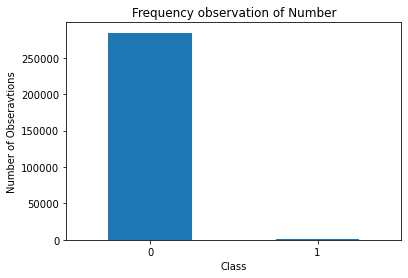

In [5]:
#visualising the imbalanced dataset
count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes.plot(kind='bar',rot=0)
# plt.xticks(range(len(dataset['Class'].unique())),dataset.Class.unique())
plt.xlabel("Class")
plt.ylabel("Number of Obseravtions")
plt.title("Frequency observation of Number")

In [6]:
#save the normal and the fradulent datatset in sepsrate dataframe
normal_dataset=dataset[dataset.Class==0]
fraud_dataset=dataset[dataset.Class==1]


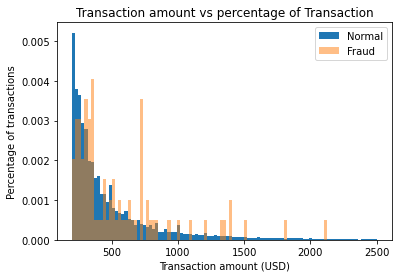

In [7]:
#Visualize the transactionamounts for normal and fradulent transactions
bins = np.linspace(200,2500,100)
plt.hist(normal_dataset.Amount, bins=bins, alpha =1 , density=True, label='Normal')
plt.hist(fraud_dataset.Amount, bins=bins, alpha =0.5 , density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title('Transaction amount vs percentage of Transaction')
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions")
plt.show()

In [53]:
sc=StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1,1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [54]:
dataset['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [55]:
RANDOM_SEED = 2021
TEST_PCT = 0.3
LABELS = ["Normal","Fraud"]

In [56]:
x_train,x_test = train_test_split(dataset,test_size=TEST_PCT,random_state=RANDOM_SEED)
x_train=x_train[x_train.Class == 0]
x_train = x_train.drop(['Class'],axis=1)
y_test=x_test['Class']
x_test=x_test.drop(['Class'],axis=1)

x_train= x_train.values
x_test= x_test.values

In [57]:
input_dim=x_train.shape[1]
encoding_dim=14
hidden_dim_1 = int(encoding_dim/2)
hidden-dim_2=4
learning_rate=1e-7

SyntaxError: cannot assign to operator (2090609403.py, line 4)

In [58]:
input_layer= tf.keras.layers.Input(shape=(input_dim))

encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",                                
                        activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder = tf.keras.layers.Dense(hidden_dim_1,activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2,activation=tf.nn.leaky_relu)(encoder)

decoder = tf.keras.layers.Dense(hidden_dim_1,activation='relu')(encoder)
decoder = tf.keras.layers.Dense(encoding_dim,activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim,activation='tanh')(decoder)

autoencoder = tf.keras.Model(inputs=input_layer,outputs=decoder)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 30)]              0         
                                                                 
 dense_45 (Dense)            (None, 14)                434       
                                                                 
 dense_46 (Dense)            (None, 7)                 105       
                                                                 
 dense_47 (Dense)            (None, 4)                 32        
                                                                 
 dense_48 (Dense)            (None, 7)                 35        
                                                                 
 dense_49 (Dense)            (None, 14)                112       
                                                                 
 dense_50 (Dense)            (None, 30)                450 

In [59]:
#Define callbacks for checkpoint and early stopping
cp = tf.keras.callbacks.ModelCheckpoint(filepath='autoencoder_fraud.h5',mode='min',monitor='val_loss',verbose=2,save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [60]:
# Compile the auto endcode

autoencoder.compile(metrics=['accuracy'],
                   loss='mean_squared_error',
                   optimizer='adam')

In [61]:
history = autoencoder.fit(x_train,x_train,
                         epochs=50,
                         batch_size=64,
                         shuffle=True,
                         validation_data=(x_test,x_test),
                         verbose=1,
                         callbacks=[cp,early_stop]).history

Epoch 1/50
3077/3110 [============================>.] - ETA: 0s - loss: 0.8099 - accuracy: 0.3617
Epoch 1: val_loss improved from inf to 0.75498, saving model to autoencoder_fraud.h5
3110/3110 [==============================] - 5s 1ms/step - loss: 0.8082 - accuracy: 0.3619 - val_loss: 0.7550 - val_accuracy: 0.4160
Epoch 2/50
3103/3110 [============================>.] - ETA: 0s - loss: 0.7005 - accuracy: 0.4137
Epoch 2: val_loss improved from 0.75498 to 0.72142, saving model to autoencoder_fraud.h5
3110/3110 [==============================] - 4s 1ms/step - loss: 0.7006 - accuracy: 0.4137 - val_loss: 0.7214 - val_accuracy: 0.4083
Epoch 3/50
3063/3110 [============================>.] - ETA: 0s - loss: 0.6802 - accuracy: 0.4068
Epoch 3: val_loss improved from 0.72142 to 0.70696, saving model to autoencoder_fraud.h5
3110/3110 [==============================] - 4s 1ms/step - loss: 0.6788 - accuracy: 0.4070 - val_loss: 0.7070 - val_accuracy: 0.4073
Epoch 4/50
3051/3110 [======================

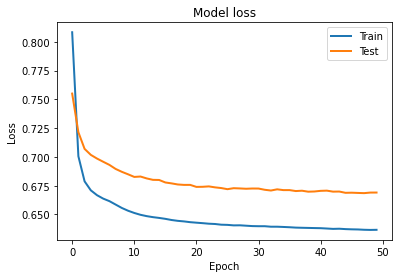

In [64]:
#plot training and test loss
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()


In [68]:
"""Detect Anomalies on test data

Anomalies are data points where the reconstruction loss is higher

To calculate the reconstruction loss on test data, 
predict the test data and calculate the mean square error between the test data and the reconstructed test data."""


test_x_predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test-test_x_predictions,2),axis=1)
error_df = pd.DataFrame({'Reconstruction_error':mse, 'True_class':y_test})
error_df.describe()

2671/2671 [==============================] - 2s 586us/step


,Reconstruction_error,True_class
count,85443.000000,85443.000000
mean,0.669056,0.001662
std,3.544200,0.040733
min,0.024945,0.000000
25%,0.171527,0.000000
50%,0.280679,0.000000
75%,0.510004,0.000000
max,302.009012,1.000000


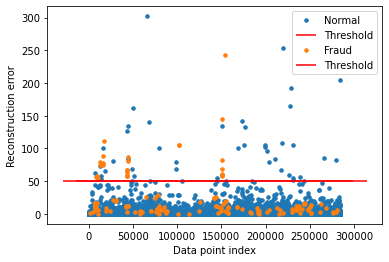

In [75]:
threshold_fixed=50
groups = error_df.groupby('True_class')
fix,ax = plt.subplots()
for name,group in groups:
    ax.plot(group.index,group.Reconstruction_error, marker='o',ms=3.5,linestyle='',label="Fraud"if name==1 else "Normal")
    ax.hlines(threshold_fixed,ax.get_xlim()[0],ax.get_xlim()[1],colors="r",zorder=100,label='Threshold')
    ax.legend()
    plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

In [80]:
import seaborn as sns
threshold_fixed =52
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))
confusion_matrix(error_df['True_class'], error_df['pred'])

 Accuracy:  0.9981859251196704
 Recall:  0.20422535211267606
 Precision:  0.4084507042253521


array([[85259,    42],
       [  113,    29]], dtype=int64)